In [47]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [48]:
# Import the csv files
purity = pd.read_csv('P625_Log.csv', delimiter=',', decimal='.')
log_ultra = pd.read_csv('UltrasonicTest0.csv', delimiter=';', decimal=',', low_memory=False)

In [49]:
# Keep only the ultrasonic purity
log_ultra = log_ultra[log_ultra['VarName'] == 'Calculated_He']

# Drop unneeded columns
log_ultra.drop(['VarName', 'Validity', 'Time_ms'], axis=1, inplace=True)

# Convert time strings to datetime objects
log_ultra['TimeString'] = pd.to_datetime(log_ultra['TimeString'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

# Trim the date range
log_ultra = log_ultra[(log_ultra['TimeString'] > '2023-03-13')]

# Change column headers for easier handling
log_ultra = log_ultra.rename(columns={'TimeString': 'time', 'VarValue': 'Purity'})

# Fix decimal and convert str to float
log_ultra['Purity'] = log_ultra['Purity'].str.replace(',', '.')
log_ultra['Purity'] = pd.to_numeric(log_ultra['Purity'])

# Remove bad values
log_ultra = log_ultra[log_ultra['Purity'] > 5]

log_ultra

,time,Purity
326476,2023-03-13 11:41:28,102.73520
326485,2023-03-13 11:41:33,102.73520
326494,2023-03-13 11:41:38,102.73520
326503,2023-03-13 11:41:43,102.73520
326512,2023-03-13 11:41:48,102.73430
...,...,...
474094,2023-03-14 10:42:26,94.82793
474103,2023-03-14 10:42:31,94.84138
474112,2023-03-14 10:42:36,94.85971
474121,2023-03-14 10:42:41,94.82304


In [50]:
# Time strings to datetime objects
purity['time'] = pd.to_datetime(purity['time'])

purity = purity[(purity['time'] > '2023-03-13 11:30:00.00')]

purity

,time,Purity
0,2023-03-14 11:40:07.200,90.001083
1,2023-03-14 11:37:14.400,90.001083
2,2023-03-14 11:34:21.600,90.001083
3,2023-03-14 11:31:28.800,90.001083
4,2023-03-14 11:28:36.000,90.001083
...,...,...
495,2023-03-13 11:54:31.200,99.237198
496,2023-03-13 11:51:38.400,99.215134
497,2023-03-13 11:48:45.600,99.217667
498,2023-03-13 11:45:52.800,99.222733


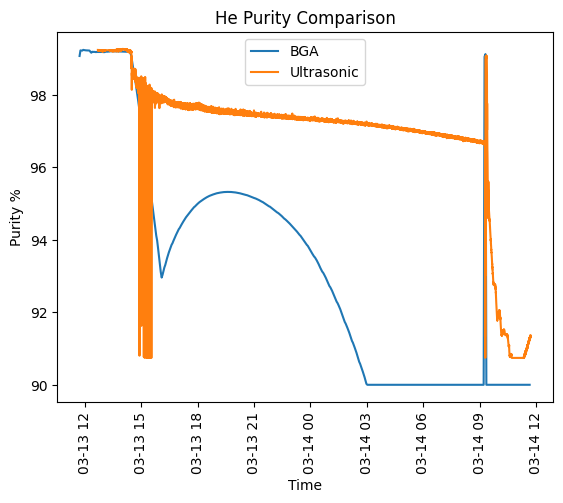

In [51]:
# Transforms before graphing
log_ultra['Purity'] = log_ultra['Purity'] - 3.5
log_ultra['time'] = log_ultra['time'] + pd.Timedelta(hours=1)

# Plot the values vs time
plt.plot(purity['time'], purity['Purity'], label='BGA')
plt.plot(log_ultra['time'], log_ultra['Purity'], label='Ultrasonic')
plt.legend()
plt.title('He Purity Comparison')
plt.xlabel('Time')
plt.ylabel('Purity %')
plt.xticks(rotation=90)
plt.show()